In [1]:

import pandas as pd
import numpy as np
import altair as alt
from tqdm import tqdm
from general_consts import *
alt.data_transformers.enable('json')


DataTransformerRegistry.enable('json')

In [2]:
def get_df(path, table_name):
    df = pd.read_csv(fr"{path}/{table_name}.csv")
    df[CPUColumns.TIME] = pd.to_datetime(df[CPUColumns.TIME], unit='s')
    return df

In [14]:
measurment_no = 6
path = fr"/home/green-sec/Repositories/GreenSecurity-FirstExperiment/Dell Inc. Linux 5.15.0-67-generic/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement {measurment_no}"
cpu_df = get_df(path, TableNames.CPU)
memory_df = get_df(path, TableNames.MEMORY)
all_processes_df = get_df(path, TableNames.ALL_PROCESSES)
disk_df = get_df(path, TableNames.DISK)
splunk_logs_df = pd.read_csv(fr"{path}/output.csv")

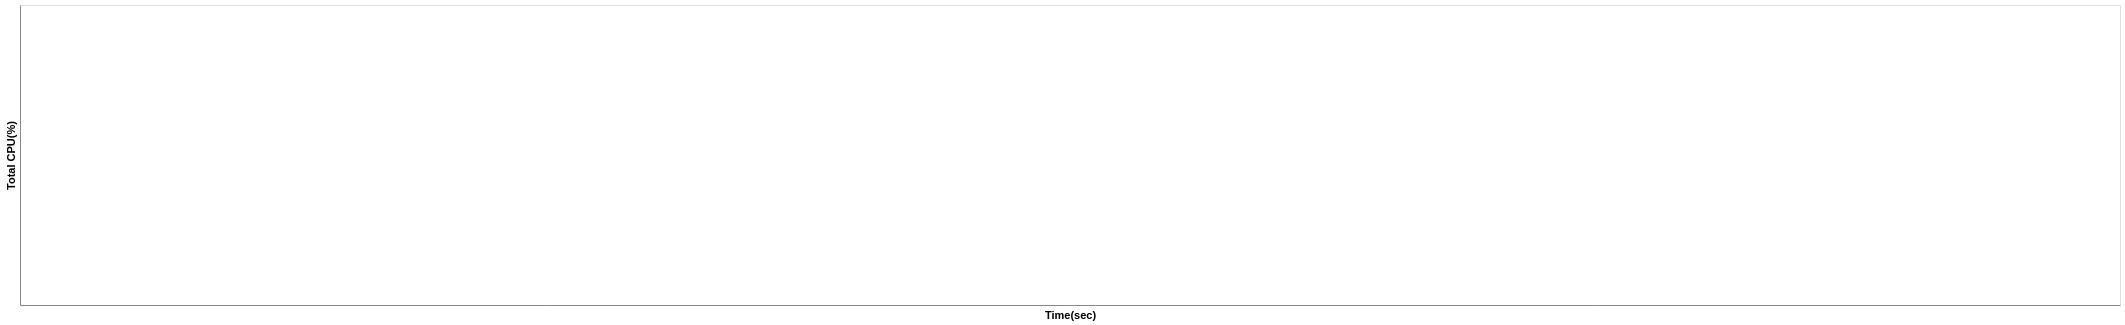

In [15]:
# import altair_saver
import vl_convert as vlc

alt.renderers.enable('altair_saver', fmts=['png'])
chart = alt.Chart(cpu_df).mark_line(interpolate='linear').encode(
    alt.Y(f"{CPUColumns.USED_PERCENT}:Q"),
    alt.X(f"{CPUColumns.TIME}:T"),
).properties(
    width=2100,
    height=300
)

# Create PNG image data and then write to a file
with alt.data_transformers.enable('default'):
    chart.save(f"{path}/graphs/cpu.png", engine="altair_saver")
# png_data = vlc.vegalite_to_png(chart.to_json(), vl_version="4.17")
# with open(f"{path}/graphs/cpu.png", "wb") as f:
#     f.write(png_data)

# 
chart

In [ ]:
ir_saver import save
chart = alt.Chart(cpu_df).mark_line(interpolate='linear').encode(
    alt.Y(f"{CPUColumns.USED_PERCENT}:Q"),
    alt.X(f"{CPUColumns.TIME}:T"),
).properties(
    width=2100,
    height=300
)
save(chart, f"{path}/graphs/cpu.png")
chart

In [10]:

chart = alt.Chart(disk_df).mark_line(interpolate='linear').encode(
    alt.Y(f"{DiskIOColumns.WRITE_COUNT}:Q"),
    alt.X(f"{CPUColumns.TIME}:T"),
).properties(
    width=2100,
    height=300
)
# save(chart, f"{path}\graphs\cpu.pdf")
chart

alt.Chart(...)

In [9]:

chart = alt.Chart(all_processes_df[all_processes_df['PID']==16200]).mark_line(interpolate='linear').encode(
    alt.Y("CPU(%):Q"),
    alt.X("Time(sec):T"),
).properties(
    width=1500,
    height=300
)
# .facet(    
#         row='PNAME:N'
# )

In [10]:
chart

alt.Chart(...)

In [5]:
import ctypes

# Attach to the console of the process with the specified PID
pid = 1472 # replace with the PID of the target process
kernel32 = ctypes.WinDLL('kernel32')
kernel32.AttachConsole(pid)

# Redirect stderr to a file
filename = 'output.txt'
handle = ctypes.windll.kernel32.CreateFileA(filename, 0x40000000, 0, None, 2, 0x80, None)
ctypes.windll.kernel32.SetStdHandle(-12, handle)

# Write to stderr
import sys
sys.stderr.write('This message will be redirected to the file')

# Detach from the console
kernel32.FreeConsole()


This message will be redirected to the file

1